In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [3]:
data = pd.read_csv('Refrigerator.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PRICE     37 non-null     int64  
 1   ECOST     37 non-null     int64  
 2   RSIZE     37 non-null     float64
 3   FSIZE     37 non-null     float64
 4   SHELVES   37 non-null     int64  
 5   S_SQ_FT   37 non-null     float64
 6   FEATURES  37 non-null     int64  
 7   BRANDNAM  37 non-null     object 
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [5]:
data.head()

,PRICE,ECOST,RSIZE,FSIZE,SHELVES,S_SQ_FT,FEATURES,BRANDNAM
0,595,75,12.8000,5.7000,3,25.4000,2,Admiral
1,685,75,12.9000,5.7000,3,26.7000,1,Admiral
2,535,67,13.3000,4.5000,1,24.0000,6,Amana
3,600,67,13.2000,4.5000,3,23.5000,5,Amana
4,605,67,13.3000,4.5000,3,24.0000,3,Amana


In [6]:
data_final = data.drop(['BRANDNAM'], axis=1)
# double check the result
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PRICE     37 non-null     int64  
 1   ECOST     37 non-null     int64  
 2   RSIZE     37 non-null     float64
 3   FSIZE     37 non-null     float64
 4   SHELVES   37 non-null     int64  
 5   S_SQ_FT   37 non-null     float64
 6   FEATURES  37 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.1 KB


In [7]:
df = data_final
df[['PRICE', 'ECOST', 'RSIZE', 'FSIZE', 'SHELVES', 'S_SQ_FT', 'FEATURES']].describe(percentiles=[0.20, 0.80])

,PRICE,ECOST,RSIZE,FSIZE,SHELVES,S_SQ_FT,FEATURES
count,37.0000,37.0000,37.0000,37.0000,37.0000,37.0000,37.0000
mean,626.3514,70.5135,13.4000,5.1838,2.5135,24.5297,3.4595
std,139.7898,9.1397,0.6005,0.9382,1.1211,2.1008,2.5121
min,460.0000,60.0000,12.6000,4.1000,1.0000,20.6000,1.0000
20%,531.0000,62.8000,12.9000,4.4000,2.0000,23.3000,1.2000
50%,590.0000,68.0000,13.2000,5.1000,2.0000,24.0000,3.0000
80%,700.0000,75.0000,14.1400,5.7000,3.0000,25.6800,5.0000
max,"1,200.0000",94.0000,14.7000,7.4000,5.0000,30.2000,12.0000


Text(0.5, 1.0, 'Correlation Matrix')

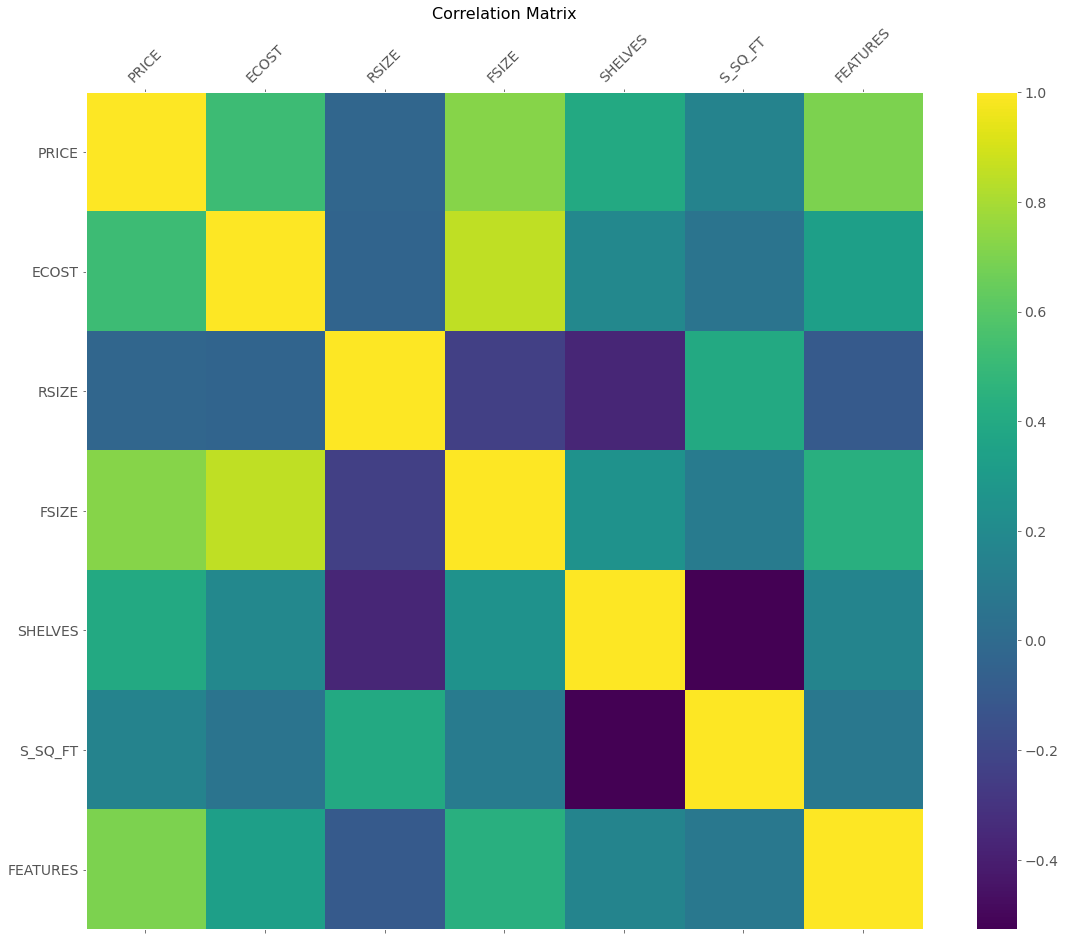

In [8]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

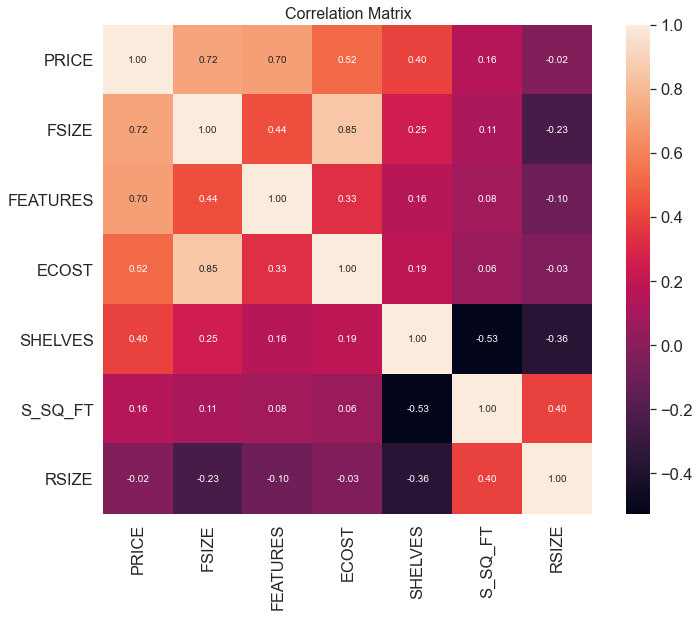

In [9]:
k=15
corr = df.corr()
cols = corr.nlargest(k, 'PRICE')['PRICE'].index
heat = np.corrcoef(df[cols].values.T)
sn.set(font_scale=1.5)
plt.subplots(figsize=(12, 9))
plt.title('Correlation Matrix', fontsize=16)
hm = sn.heatmap(heat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [10]:
df = data_final
# subset the data
data_1 = data.loc[:,['PRICE', 'FSIZE', 'FEATURES', 'ECOST', 'SHELVES']]
# build the model.
# Note that we use this equation to formulate the regression model
# 'PRICE ~ FSIZE + FEATURES + ECOST + SHELVES'
# the left-hand side is the y variable and right-hand side is the x variables

model_1 = sm.formula.ols('PRICE ~ FSIZE + FEATURES + ECOST + SHELVES', data_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     24.91
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           1.94e-09
Time:                        02:57:24   Log-Likelihood:                -208.61
No. Observations:                  37   AIC:                             427.2
Df Residuals:                      32   BIC:                             435.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    219.5090     99.500      2.206      0.035      16.833     422.185
FSIZE        103.3585     26.677      3.875      0.000      49.020     157.697
FEATURES      24.8441      5.427      4.577      0.000      13.789      35.900
ECOST         -3.9462      2.582     -1.528      0.136      -9.206       1.314
SHELVES       25.2106     11.259      2.239      0.032       2.276      48.145
==============================================================================
Omnibus:                        3.321   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                1.595
Skew:                           0.126   Prob(JB):                        0.450
Kurtosis:                       2.015   Cond. No.                         593.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# subset the data
data_2 = data.loc[:,['PRICE', 'FSIZE', 'FEATURES', 'SHELVES']]
# build the model.
# Note that we use this equation to formulate the regression model
# 'PRICE ~ FSIZE + FEATURES + SHELVES'
# the left-hand side is the y variable and right-hand side is the x variables

model_2 = sm.formula.ols('PRICE ~ FSIZE + FEATURES + SHELVES', data_1).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     31.18
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           9.51e-10
Time:                        02:58:48   Log-Likelihood:                -209.91
No. Observations:                  37   AIC:                             427.8
Df Residuals:                      33   BIC:                             434.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    112.6759     72.217      1.560      0.128     -34.251     259.603
FSIZE         69.4065     15.060      4.609      0.000      38.768     100.046
FEATURES      25.5558      5.516      4.633      0.000      14.334      36.778
SHELVES       26.0503     11.471      2.271      0.030       2.712      49.388
==============================================================================
Omnibus:                        1.240   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                1.011
Skew:                           0.158   Prob(JB):                        0.603
Kurtosis:                       2.254   Cond. No.                         42.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constant item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [17]:
data_2_new = drop_column_using_vif_(data_2.drop('PRICE', axis=1))

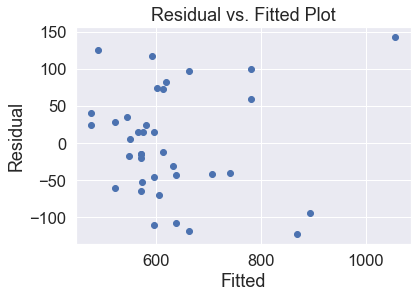

In [18]:
# plot 
plt.scatter(model_2.fittedvalues, model_2.resid)
# adding title and labels
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()

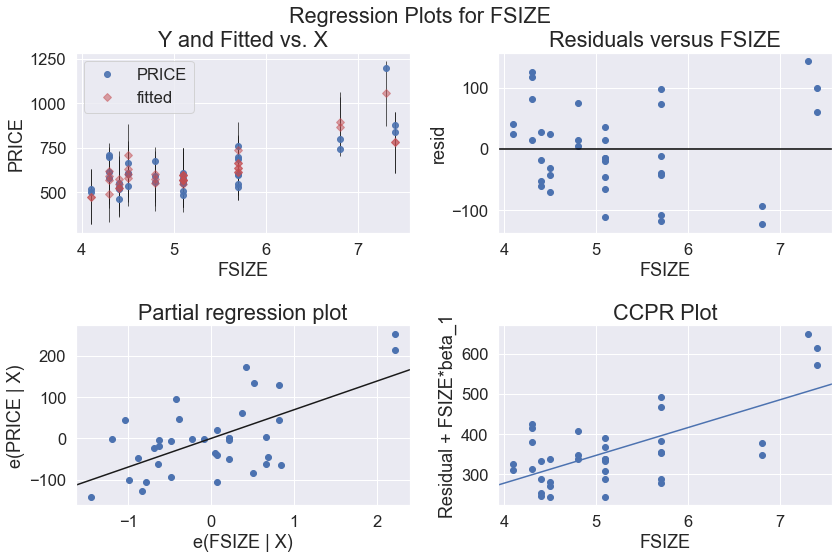

In [19]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_2, 'FSIZE', fig=fig)

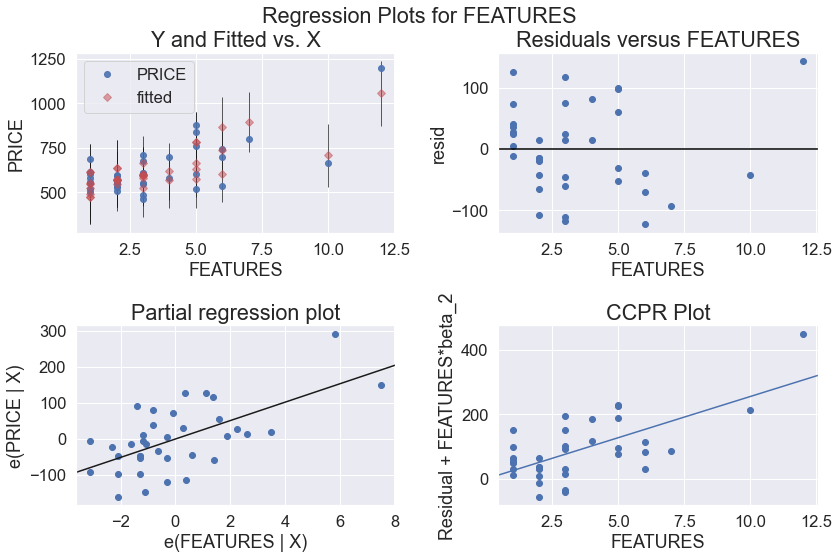

In [20]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_2, 'FEATURES', fig=fig)

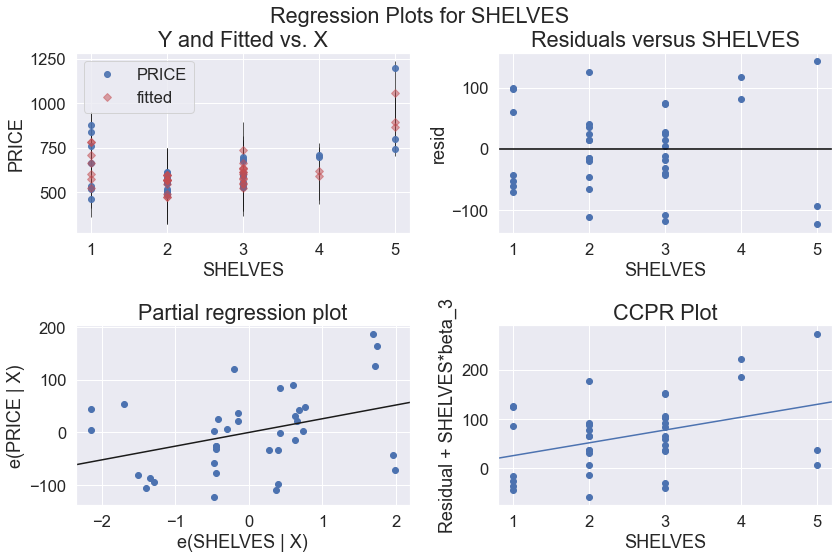

In [21]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_2, 'SHELVES', fig=fig)

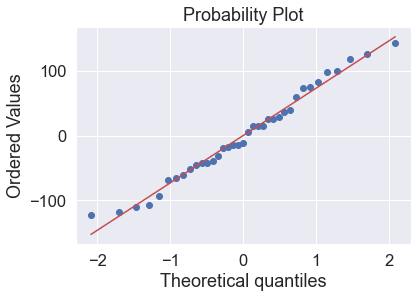

In [22]:
resid = model_2.resid
from scipy.stats import probplot
plt.figure()
probplot(resid, plot=plt)
plt.show()